In [5]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
import matplotlib.pyplot as plt
from shapely.affinity import rotate
import seaborn as sns
sns.set_style("whitegrid")

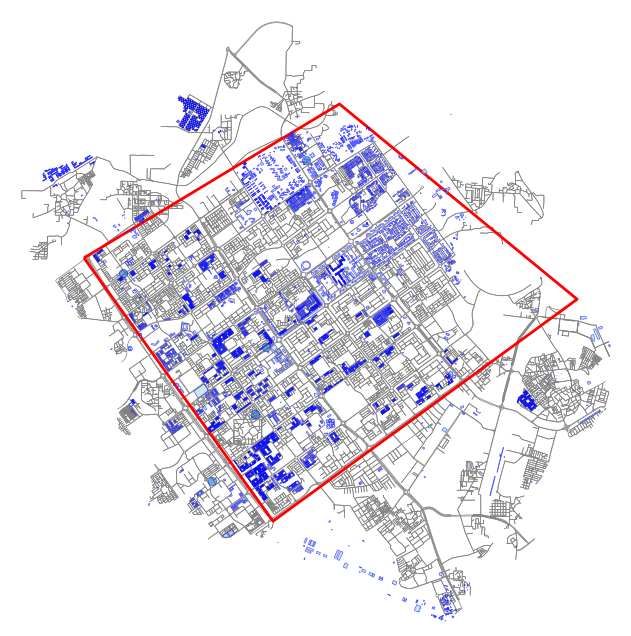

In [4]:
# Step 1: Get a base map (road network) of Chandigarh
place = "Chandigarh, India"
G = ox.graph_from_place(place, network_type="drive")

# Step 2: Get building footprints
tags = {"building": True}
buildings = ox.features.features_from_place(place, tags)

"""
bottom left - 30.743238, 76.721490
bottom right - 30.688879, 76.766889
top left - 30.775032, 76.782861
top right - 30.742677, 76.831495
"""

bbox_polygon = Polygon([(76.721490, 30.743238), (76.766889, 30.688879), (76.839948, 30.734717), (76.782861, 30.775032)])
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_polygon], crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(8, 8))
ox.plot_graph(G, ax=ax, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False)
bbox_gdf.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=2)

buildings.plot(ax=ax, facecolor="lightblue", edgecolor="blue", linewidth=0.5, alpha=0.6)

plt.show()


                                      geometry  bus   highway  \
element id                                                      
node    1041047045   POINT (76.76606 30.72475)  yes  bus_stop   
        4306384689    POINT (76.7505 30.71537)  yes  bus_stop   
        4336755819   POINT (76.77802 30.73674)  yes  bus_stop   
        4414952590     POINT (76.783 30.76014)  yes  bus_stop   
        11053544182  POINT (76.74738 30.74132)  yes  bus_stop   
        11053559568  POINT (76.77529 30.76002)  yes  bus_stop   
        11053565187  POINT (76.74869 30.74187)  yes  bus_stop   
        11147439160  POINT (76.78176 30.73126)  NaN  bus_stop   
        11147476433  POINT (76.77872 30.73269)  NaN  bus_stop   
        11335525457   POINT (76.8036 30.72698)  yes  bus_stop   
        11335525458  POINT (76.80741 30.72267)  yes  bus_stop   
        11335525459  POINT (76.79278 30.73861)  yes  bus_stop   

                                      name public_transport  \
element id                

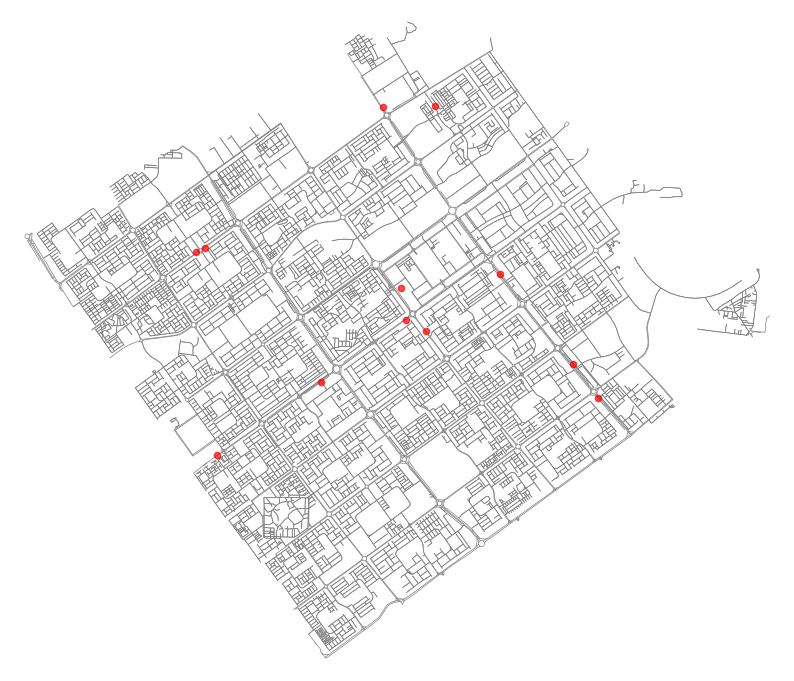

In [39]:
reduced_area = ox.graph_from_polygon(bbox_polygon, network_type='drive')

tags = {
    'highway': 'bus_stop', 
    # 'public_transport': ['stop_position', 'platform', 'station'],
    # 'amenity': 'bus_station'
    }

public_trasport_features = ox.features_from_polygon(bbox_polygon, tags=tags)
public_transport_features = public_trasport_features.set_crs("EPSG:4326")
# public_transport_features = public_transport_features[1:]
print(public_transport_features)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
ox.plot_graph(reduced_area, ax=ax, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False)
public_transport_features.plot(ax=ax, color="red", markersize=20, alpha=0.7)
plt.show()

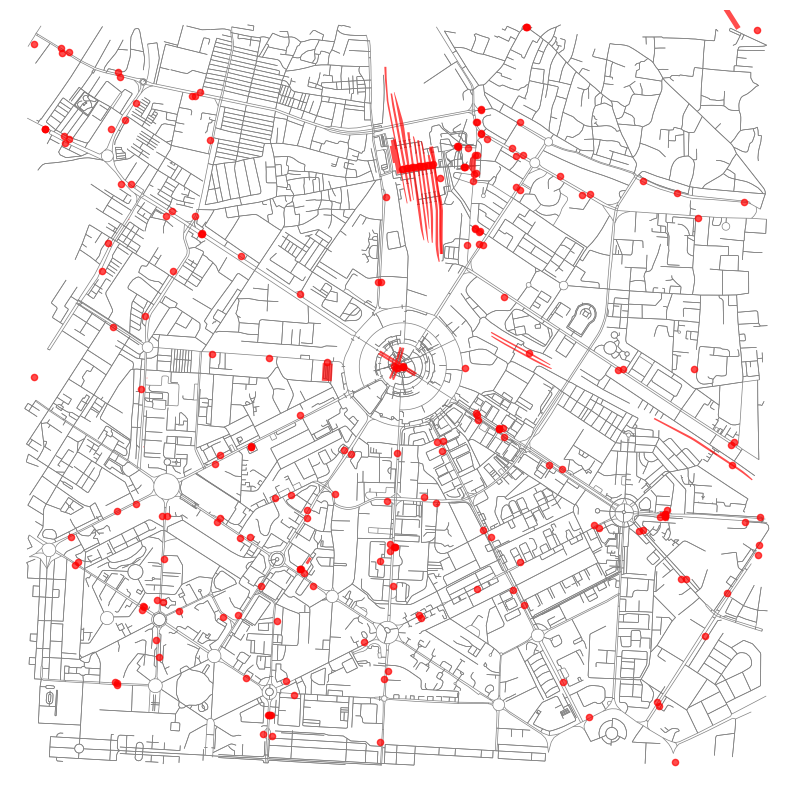

In [31]:
cp = ox.graph_from_point((28.6314022, 77.2193791), dist=2000, network_type='all')

pt_features = ox.features_from_point((28.6314022, 77.2193791), dist=2000, tags=tags)

fig, ax = plt.subplots(figsize=(10, 10))
ox.plot_graph(cp, ax=ax, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False)
pt_features.plot(ax=ax, color="red", markersize=20, alpha=0.7)

plt.show()

---
**9th March**

- AQI Data from sector 22
- Bus Stops Around Sector 22



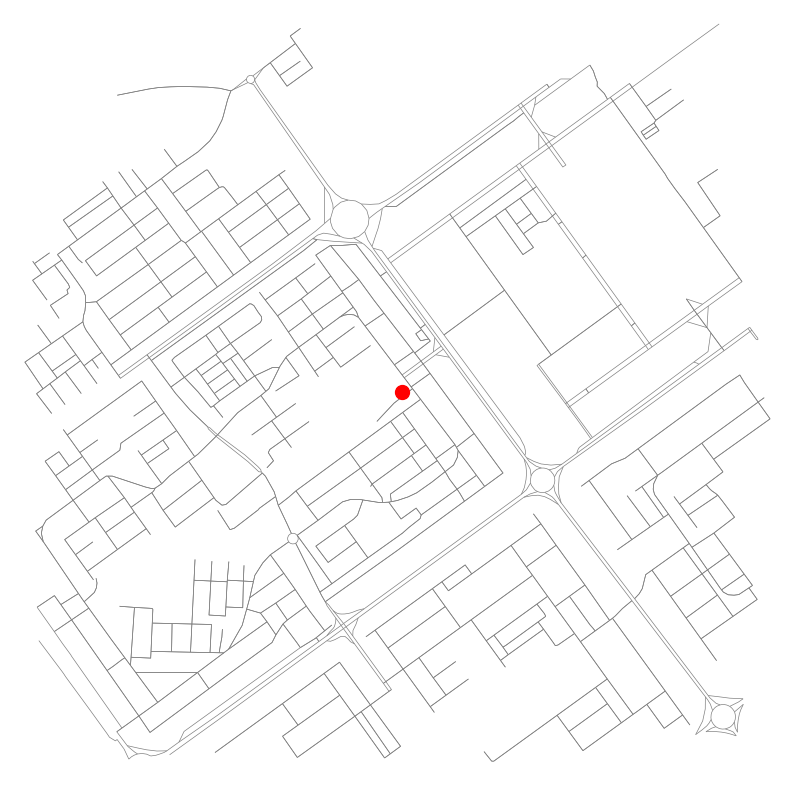

In [8]:
# Define the point and buffer distance
point = (30.735567, 76.775714)
buffer_dist = 1000  # in meters

# Get the graph within the buffer distance
buffer_graph = ox.graph_from_point(point, dist=buffer_dist, network_type='drive')

# Plot the graph and buffer
fig, ax = plt.subplots(figsize=(10, 10))
ox.plot_graph(buffer_graph, ax=ax, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False)
ax.scatter(point[1], point[0], s=100, color='red', zorder=5)

plt.show()

In [16]:
df = df.sort_values("Timestamp")
df[["Timestamp", "AQI"]]

,Timestamp,AQI
0,2025-03-08 17:26:15,70
1,2025-03-08 18:26:18,80
2,2025-03-08 19:26:21,103
3,2025-03-08 20:26:23,127
4,2025-03-08 21:26:25,151
5,2025-03-08 22:26:28,156
6,2025-03-08 23:26:31,159
7,2025-03-09 00:26:33,164
8,2025-03-09 01:26:35,162
9,2025-03-09 02:26:37,155


In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
from IPython.display import HTML

# 1. Load and prepare the AQI data
df = pd.read_csv('Sector_22_aqi.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.sort_values('Timestamp', inplace=True)

# 2. Get the base map graph using OSMnx
point = (30.735567, 76.775714)  # (lat, lon)
buffer_dist = 1000  # in meters
graph = ox.graph_from_point(point, dist=buffer_dist, network_type='all')

# 3. Create figure with two panels: main map (top) and timeline (bottom)
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 1, height_ratios=[4, 1])
ax_main = fig.add_subplot(gs[0, 0])
ax_timeline = fig.add_subplot(gs[1, 0])

# 4. Plot the base map on the main axis
ox.plot_graph(graph, ax=ax_main, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False)

# 5. Add an overlay patch to the main axis covering the entire area
xlims = ax_main.get_xlim()
ylims = ax_main.get_ylim()
patch = Rectangle((xlims[0], ylims[0]),
                  width=xlims[1] - xlims[0],
                  height=ylims[1] - ylims[0],
                  facecolor='none',
                  alpha=0.3,
                  zorder=1)
ax_main.add_patch(patch)

# 6. Add a text annotation for timestamp and AQI on the main axis
text = ax_main.text(0.05, 0.95, '', transform=ax_main.transAxes, fontsize=14,
                    verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# 7. Prepare the horizontal timeline using AQI values
n = len(df)
aqi_values = df['AQI'].values.reshape(1, n)  # shape (1, n)
norm = mpl.colors.Normalize(vmin=0, vmax=300)

# Use a more noticeable colormap, "jet"
cmap = mpl.cm.get_cmap('jet')
im = ax_timeline.imshow(aqi_values, aspect='auto', cmap=cmap, norm=norm)

# Add labels and ticks to the timeline
ax_timeline.set_xticks([0, n - 1])
ax_timeline.set_xticklabels([df['Timestamp'].iloc[0].strftime('%H:%M'),
                             df['Timestamp'].iloc[-1].strftime('%H:%M')])
ax_timeline.set_yticks([])  # remove y-axis ticks
ax_timeline.set_xlabel('Time')
ax_timeline.set_title('AQI Timeline')

# 8. Add a vertical line indicator to the timeline for the current time
line = ax_timeline.axvline(x=0, color='yellow', linewidth=2)

# 9. Define initialization and update functions for the animation
def init():
    patch.set_facecolor('none')
    text.set_text('')
    line.set_xdata([0, 0])  # set as a sequence
    return patch, text, line

def animate(i):
    current_row = df.iloc[i]
    aqi = current_row['AQI']
    
    # Update the overlay color in the main panel based on the AQI value
    color = cmap(norm(aqi))
    patch.set_facecolor(color)
    
    # Update the text annotation with current time and AQI
    timestamp_str = current_row['Timestamp'].strftime('%Y-%m-%d %H:%M:%S')
    text.set_text(f"Time: {timestamp_str}\nAQI: {aqi}")
    
    # Move the vertical indicator in the timeline
    line.set_xdata([i, i])
    
    return patch, text, line

anim = FuncAnimation(fig, animate, frames=n, init_func=init, interval=500, blit=True)

plt.close()

# Display the animation inline as an HTML5 video in Jupyter Notebook
HTML(anim.to_html5_video())

/var/folders/_w/s9pmmwy562s33brj01xynnt80000gn/T/ipykernel_54475/2983588328.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('jet')


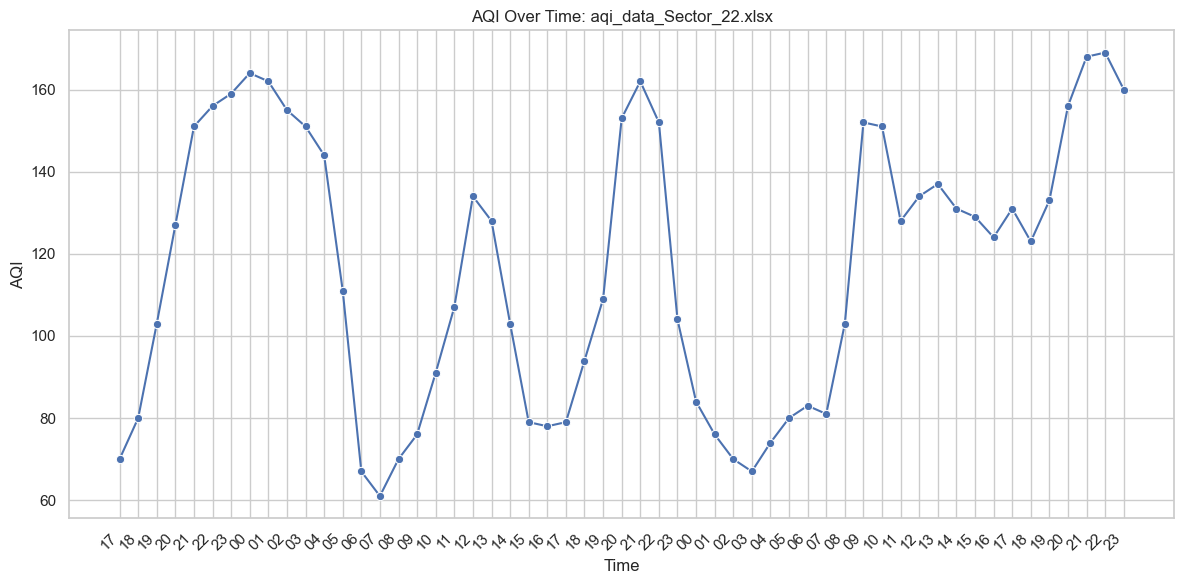

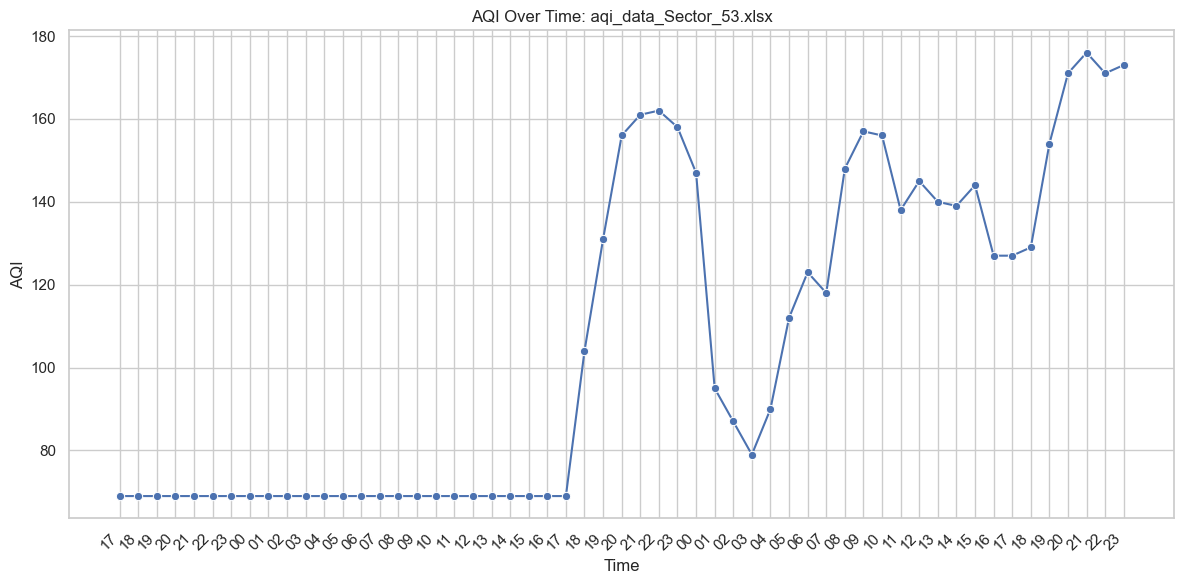

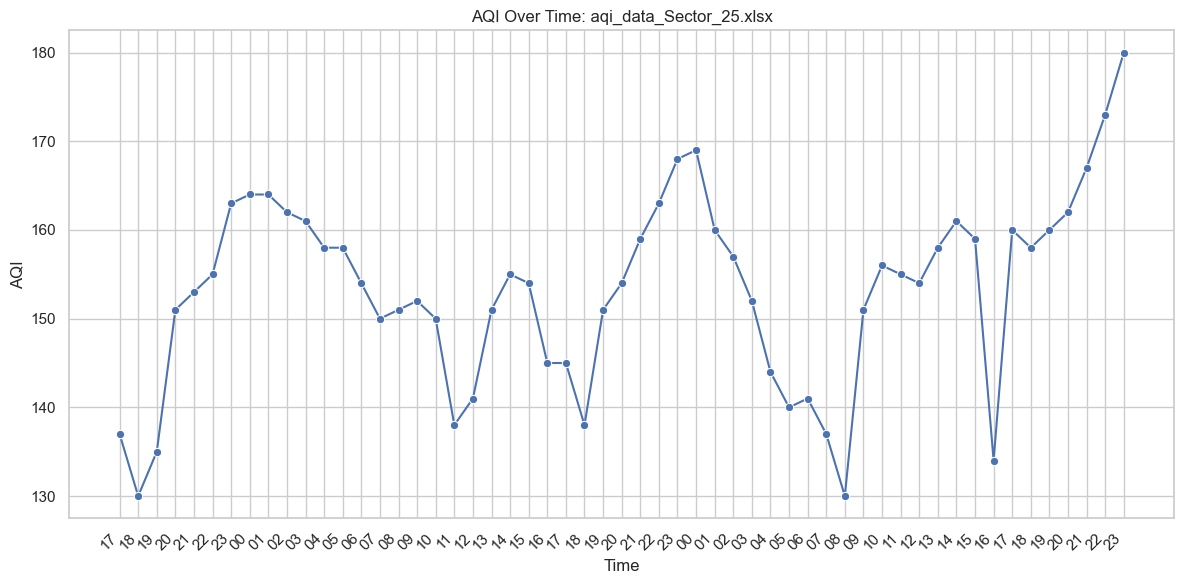

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Folder containing AQI datasets
folder_path = "aqi_data"

# Get all Excel files in the folder
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Handle case where no files are found
if not excel_files:
    print("No Excel files found in the folder.")
    exit()

# Define the date range for filtering
start_date = "2025-03-08"
end_date = "2025-03-11"

# Plot AQI data for each file separately
for file in excel_files:
    file_path = os.path.join(folder_path, file)

    # Load data
    df = pd.read_excel(file_path)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Filter data for 9th March to 10th March
    df = df[(df['Timestamp'] >= start_date) & (df['Timestamp'] < end_date)]

    # If no data is left after filtering, skip this file
    if df.empty:
        print(f"No data in the given range for {file}. Skipping...")
        continue

    # Create a new figure for each dataset
    plt.figure(figsize=(12, 6))

    # Plot AQI over time
    sns.lineplot(x=df['Timestamp'], y=df['AQI'], marker="o")

    # Formatting
    plt.title(f'AQI Over Time: {file}')
    plt.ylabel('AQI')
    plt.xlabel('Time')

    # Show only hour (HH) on x-axis
    plt.xticks(df['Timestamp'], df['Timestamp'].dt.strftime('%H'), rotation=45, ha='right')

    # Display the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


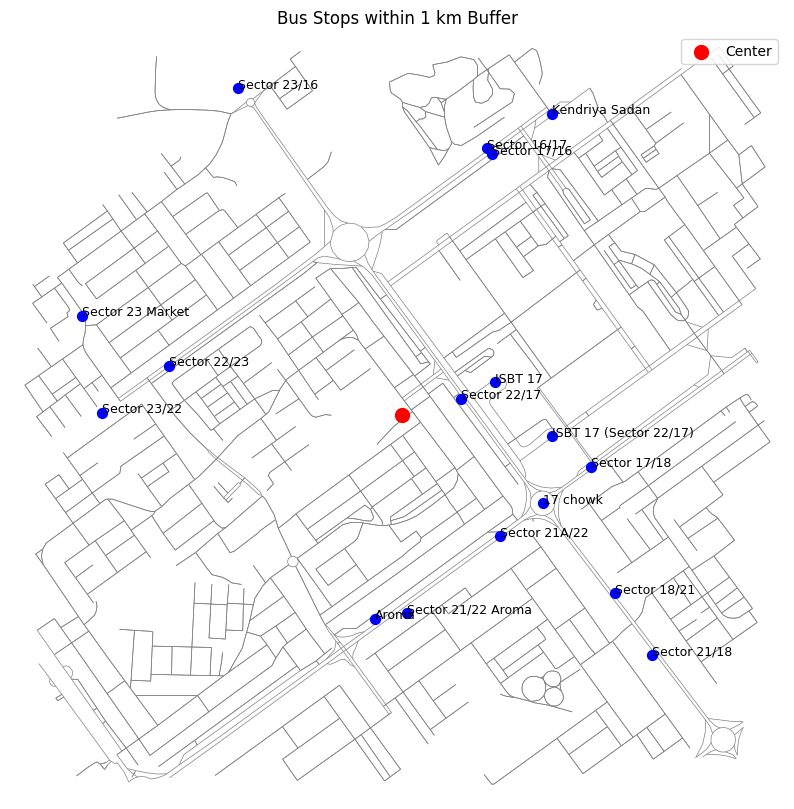

In [31]:
# Bus Stops in Sector 22

import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Haversine distance function (returns km)
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Earth radius in kilometers
    return km

# Define the center point and buffer distance (1 km)
center_point = (30.735567, 76.775714)  # (lat, lon)
buffer_radius_km = 1.0

# Load bus stop locations CSV
bus_stops = pd.read_csv("scarping_scripts/scarped_data/bus_stop_locations.csv")
# bus_stops CSV has columns: name, lat, long

# Compute distance of each bus stop from the center point using the haversine formula
bus_stops["distance_km"] = bus_stops.apply(
    lambda row: haversine(center_point[1], center_point[0], row["long"], row["lat"]), axis=1
)

# Filter bus stops within 1 km
bus_stops_within_buffer = bus_stops[
    (bus_stops["distance_km"] <= buffer_radius_km) & 
    (~bus_stops["name"].str.contains("school", case=False, na=False)) &
    (~bus_stops["name"].str.contains("guru", case=False, na=False)) &
    (~bus_stops["name"].str.contains("community", case=False, na=False)) &
    (~bus_stops["name"].str.contains("park", case=False, na=False))
]

# Get the street network graph within a 1 km buffer around the center point
graph = ox.graph_from_point(center_point, dist=1000, network_type="all")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))
ox.plot_graph(graph, ax=ax, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False)

# Plot the center point
ax.scatter(center_point[1], center_point[0], s=100, color="red", zorder=5, label="Center")

# Plot bus stops within the buffer
for _, row in bus_stops_within_buffer.iterrows():
    ax.scatter(row["long"], row["lat"], s=50, color="blue", zorder=6)
    ax.text(row["long"], row["lat"], row["name"], fontsize=9, zorder=7)

ax.legend()
plt.title("Bus Stops within 1 km Buffer")
plt.show()

/var/folders/_w/s9pmmwy562s33brj01xynnt80000gn/T/ipykernel_22263/278003571.py:90: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


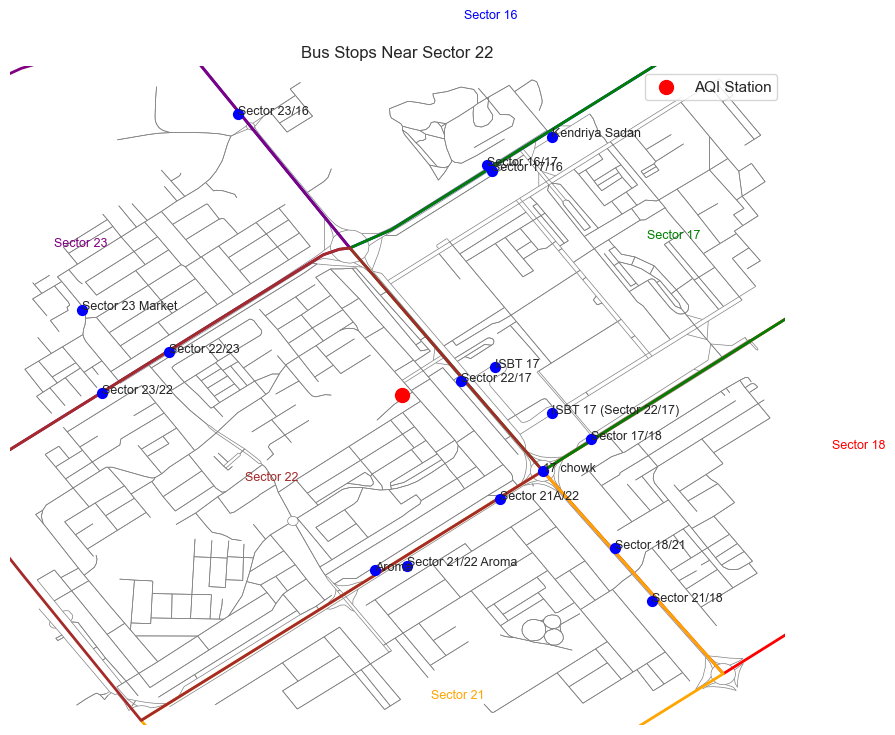

In [13]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd

# --- Helper function: Haversine distance ---
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Earth radius in kilometers
    return km

# --- Define center point and buffer (Sector 22) ---
center_point = (30.735567, 76.775714)  # (lat, lon)
buffer_radius_km = 1.0

# --- Load and filter bus stop data ---
bus_stops = pd.read_csv("scarping_scripts/scarped_data/bus_stop_locations.csv")
# Calculate distance (using haversine: note lon, lat ordering for the function)
bus_stops["distance_km"] = bus_stops.apply(
    lambda row: haversine(center_point[1], center_point[0], row["long"], row["lat"]),
    axis=1
)
# Filter bus stops within 1 km and exclude unwanted keywords
bus_stops_within_buffer = bus_stops[
    (bus_stops["distance_km"] <= buffer_radius_km) & 
    (~bus_stops["name"].str.contains("school", case=False, na=False)) &
    (~bus_stops["name"].str.contains("guru", case=False, na=False)) &
    (~bus_stops["name"].str.contains("community", case=False, na=False)) &
    (~bus_stops["name"].str.contains("park", case=False, na=False))
]

# --- Get the street network graph (1 km buffer) ---
graph = ox.graph_from_point(center_point, dist=1000, network_type="all")

# --- Create a circular buffer polygon around the center ---
# Create a GeoDataFrame for the center point
center_geom = Point(center_point[1], center_point[0])
center_gdf = gpd.GeoDataFrame({'geometry': [center_geom]}, crs="EPSG:4326")
# Project to a metric CRS (UTM zone for Chandigarh, e.g. EPSG:32643)
center_gdf_proj = center_gdf.to_crs(epsg=32643)
buffer_polygon_proj = center_gdf_proj.buffer(1000).iloc[0]
# Reproject back to lat/lon (EPSG:4326)
buffer_polygon = gpd.GeoSeries([buffer_polygon_proj], crs=center_gdf_proj.crs).to_crs(epsg=4326).iloc[0]

# --- Get sector boundaries from OSM ---
# Use an OSM query for administrative boundaries at a level that may correspond to sectors (e.g., admin_level=10)
tags = {'boundary': 'administrative', 'admin_level': '10'}
sectors_gdf = ox.features_from_place("Chandigarh, India", tags=tags)
# Restrict to polygon geometries
sectors_gdf = sectors_gdf[sectors_gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]
# Filter for those whose names contain "Sector"
sectors_gdf = sectors_gdf[sectors_gdf['name'].str.contains('Sector', case=False, na=False)]
# Further filter sectors to those that intersect our 1 km buffer
sectors_in_buffer = sectors_gdf[sectors_gdf.intersects(buffer_polygon)]

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the street network graph
ox.plot_graph(graph, ax=ax, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False)

# Optional: Plot the 1 km buffer outline
# gpd.GeoSeries(buffer_polygon).plot(ax=ax, facecolor='none', edgecolor='black', linestyle='--', linewidth=1)

# Plot sector boundaries with different colors and labels
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
for i, (idx, sector) in enumerate(sectors_in_buffer.iterrows()):
    color = colors[i % len(colors)]
    gpd.GeoSeries(sector.geometry).plot(ax=ax, facecolor='none', edgecolor=color, linewidth=2,
                                         label=sector.get('name', f"Sector {i}"))
    # Annotate with the sector name at the centroid of the polygon
    centroid = sector.geometry.centroid
    ax.text(centroid.x, centroid.y, sector.get('name', f"Sector {i}"), fontsize=9, color=color)

# Plot the center point
ax.scatter(center_point[1], center_point[0], s=100, color="red", zorder=5, label="AQI Station")

# Plot bus stops within the buffer
for _, row in bus_stops_within_buffer.iterrows():
    ax.scatter(row["long"], row["lat"], s=50, color="blue", zorder=6)
    ax.text(row["long"], row["lat"], row["name"], fontsize=9, zorder=7)

ax.legend()
plt.title("Bus Stops Near Sector 22")
plt.show()

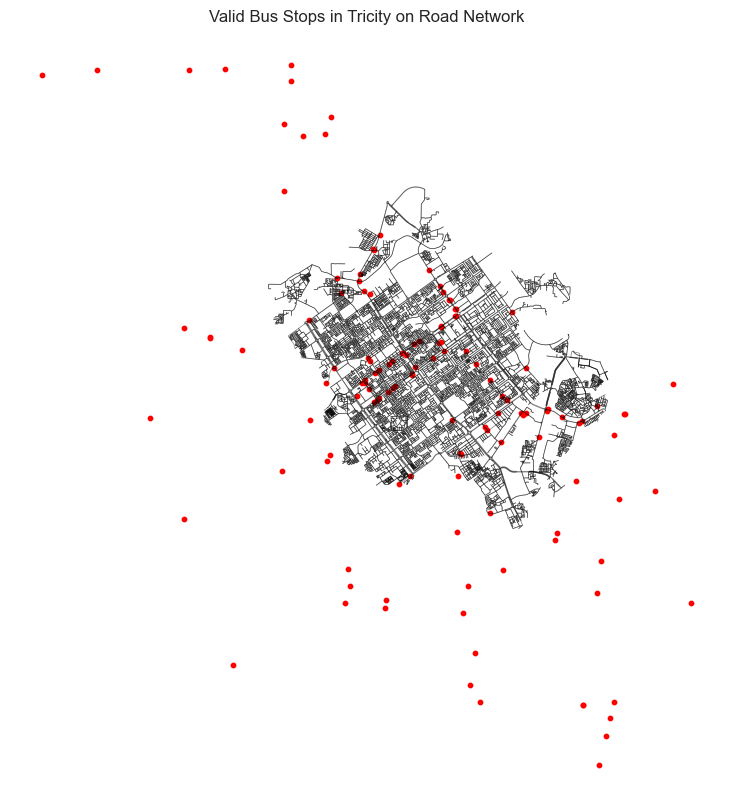

In [30]:
place_names = ["Chandigarh, India", "Mohali, India"]
graph = ox.graph_from_place(place_names, network_type="drive")
gdf_edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)


df = pd.read_csv("scarping_scripts/scarped_data/cleaned_bus_stops_locations.csv")
valid_stops = df[df["Coords"].notnull()].copy()
valid_stops.loc[:, "geometry"] = valid_stops["Coords"].apply(lambda x: Point(eval(x)[1], eval(x)[0])) 
gdf_stops = gpd.GeoDataFrame(valid_stops, geometry="geometry", crs="EPSG:4326")
gdf_stops = gdf_stops[["Name", "geometry"]]

fig, ax = plt.subplots(figsize=(10, 10))
gdf_edges.plot(ax=ax, linewidth=0.5, color="black", alpha=0.5)  # Plot road network
gdf_stops.plot(ax=ax, color="red", markersize=10)

plt.grid('off')
plt.axis('off')
plt.title("Valid Bus Stops in Tricity on Road Network")
plt.show()

/var/folders/_w/s9pmmwy562s33brj01xynnt80000gn/T/ipykernel_53763/4269171036.py:83: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


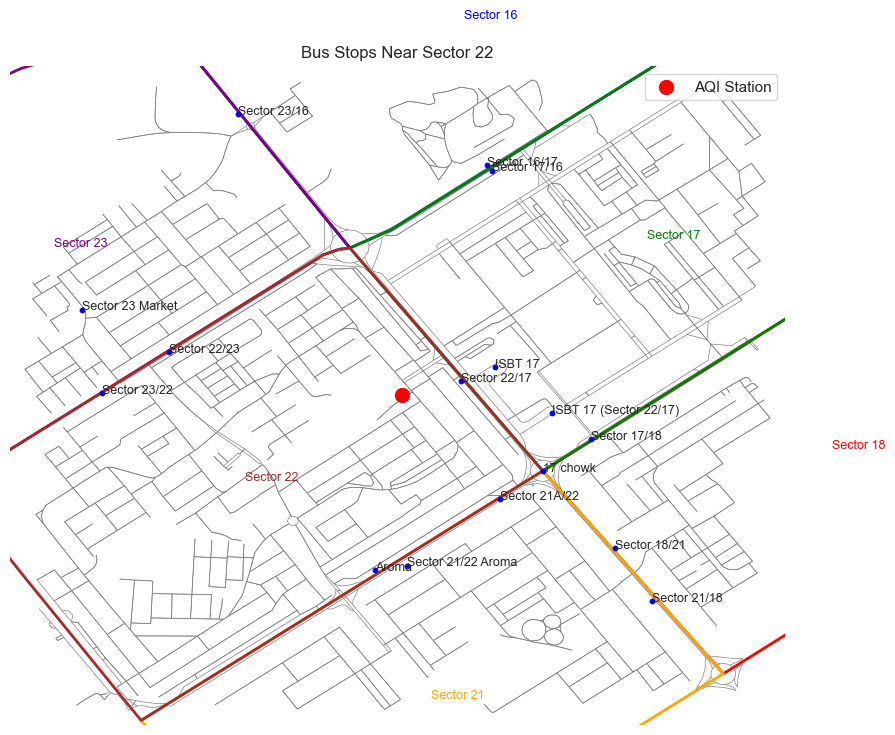

In [43]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd

# --- Helper function: Haversine distance ---
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Earth radius in kilometers
    return km

# --- Define center point and buffer (Sector 22) ---
center_point = (30.735567, 76.775714)  # (lat, lon)
buffer_radius_km = 1.0

# --- Load and filter bus stop data ---
bus_stops = pd.read_csv("scarping_scripts/scarped_data/final_locations.csv")
# Calculate distance (using haversine: note lon, lat ordering for the function)
bus_stops["distance_km"] = bus_stops.apply(
    lambda row: haversine(center_point[1], center_point[0], row["long"], row["lat"]),
    axis=1
)
# Filter bus stops within 1 km and exclude unwanted keywords
bus_stops_within_buffer = bus_stops[
    (bus_stops["distance_km"] <= buffer_radius_km)
]

# --- Get the street network graph (1 km buffer) ---
graph = ox.graph_from_point(center_point, dist=1000, network_type="all")

# --- Create a circular buffer polygon around the center ---
# Create a GeoDataFrame for the center point
center_geom = Point(center_point[1], center_point[0])
center_gdf = gpd.GeoDataFrame({'geometry': [center_geom]}, crs="EPSG:4326")
# Project to a metric CRS (UTM zone for Chandigarh, e.g. EPSG:32643)
center_gdf_proj = center_gdf.to_crs(epsg=32643)
buffer_polygon_proj = center_gdf_proj.buffer(1000).iloc[0]
# Reproject back to lat/lon (EPSG:4326)
buffer_polygon = gpd.GeoSeries([buffer_polygon_proj], crs=center_gdf_proj.crs).to_crs(epsg=4326).iloc[0]

# --- Get sector boundaries from OSM ---
# Use an OSM query for administrative boundaries at a level that may correspond to sectors (e.g., admin_level=10)
tags = {'boundary': 'administrative', 'admin_level': '10'}
sectors_gdf = ox.features_from_place("Chandigarh, India", tags=tags)
# Restrict to polygon geometries
sectors_gdf = sectors_gdf[sectors_gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]
# Filter for those whose names contain "Sector"
sectors_gdf = sectors_gdf[sectors_gdf['name'].str.contains('Sector', case=False, na=False)]
# Further filter sectors to those that intersect our 1 km buffer
sectors_in_buffer = sectors_gdf[sectors_gdf.intersects(buffer_polygon)]

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 10))


ox.plot_graph(graph, ax=ax, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False)

# Plot sector boundaries with different colors and labels
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
for i, (idx, sector) in enumerate(sectors_in_buffer.iterrows()):
    color = colors[i % len(colors)]
    gpd.GeoSeries(sector.geometry).plot(ax=ax, facecolor='none', edgecolor=color, linewidth=2,
                                         label=sector.get('name', f"Sector {i}"))
    # Annotate with the sector name at the centroid of the polygon
    centroid = sector.geometry.centroid
    ax.text(centroid.x, centroid.y, sector.get('name', f"Sector {i}"), fontsize=9, color=color)

# Plot the center point
ax.scatter(center_point[1], center_point[0], s=100, color="red", zorder=5, label="AQI Station")

# Plot bus stops within the buffer
for _, row in bus_stops_within_buffer.iterrows():
    ax.scatter(row["long"], row["lat"], s=10, color="blue", zorder=6)
    ax.text(row["long"], row["lat"], row["name"], fontsize=9, zorder=7)

ax.legend()
plt.title("Bus Stops Near Sector 22")
plt.show()